In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('data').sheet1

rows = worksheet.get_all_values()


In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df1 = df.astype({'input':'float'})
df1 = df.astype({'output':'float'})
df1.head()

,input,output
0,1,11.0
1,2,22.0
2,3,33.0
3,4,44.0
4,5,55.0


In [ ]:
x = df1[['input']].values

In [ ]:
y = df1[['output']].values

In [ ]:
x

array([['1'],
       ['2'],
       ['3'],
       ['4'],
       ['5'],
       ['6'],
       ['7'],
       ['8'],
       ['9'],
       ['10'],
       ['11'],
       ['12'],
       ['13'],
       ['14'],
       ['15'],
       ['16'],
       ['17'],
       ['18'],
       ['19'],
       ['20'],
       ['21'],
       ['22'],
       ['23'],
       ['24'],
       ['25'],
       ['26'],
       ['27'],
       ['28'],
       ['29'],
       ['30'],
       ['31'],
       ['32'],
       ['33'],
       ['34'],
       ['35'],
       ['36'],
       ['37'],
       ['38'],
       ['39'],
       ['40'],
       ['41'],
       ['42'],
       ['43'],
       ['44'],
       ['45'],
       ['46'],
       ['47'],
       ['48'],
       ['49'],
       ['50']], dtype=object)

In [ ]:
y

array([[ 11.],
       [ 22.],
       [ 33.],
       [ 44.],
       [ 55.],
       [ 66.],
       [ 77.],
       [ 88.],
       [ 99.],
       [110.],
       [121.],
       [132.],
       [143.],
       [154.],
       [165.],
       [176.],
       [187.],
       [198.],
       [209.],
       [220.],
       [231.],
       [242.],
       [253.],
       [264.],
       [275.],
       [286.],
       [297.],
       [308.],
       [319.],
       [330.],
       [341.],
       [352.],
       [363.],
       [374.],
       [385.],
       [396.],
       [407.],
       [418.],
       [429.],
       [440.],
       [451.],
       [462.],
       [473.],
       [484.],
       [495.],
       [506.],
       [517.],
       [528.],
       [539.],
       [550.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1 = scaler.transform(x_train)

In [ ]:
x_train1 = scaler.transform(x_train)


In [ ]:
ai_brain = Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss = 'mse')


In [ ]:
ai_brain.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
2/2 [==============================] - 1s 12ms/step - loss: 102960.0859
Epoch 2/2000
2/2 [==============================] - 0s 7ms/step - loss: 102949.5859
Epoch 3/2000
2/2 [==============================] - 0s 7ms/step - loss: 102936.9766
Epoch 4/2000
2/2 [==============================] - 0s 7ms/step - loss: 102926.4453
Epoch 5/2000
2/2 [==============================] - 0s 7ms/step - loss: 102918.1484
Epoch 6/2000
2/2 [==============================] - 0s 10ms/step - loss: 102910.6719
Epoch 7/2000
2/2 [==============================] - 0s 9ms/step - loss: 102906.7422
Epoch 8/2000
2/2 [==============================] - 0s 6ms/step - loss: 102901.8359
Epoch 9/2000
2/2 [==============================] - 0s 6ms/step - loss: 102895.2578
Epoch 10/2000
2/2 [==============================] - 0s 9ms/step - loss: 102887.8750
Epoch 11/2000
2/2 [==============================] - 0s 7ms/step - loss: 102882.7344
Epoch 12/2000
2/2 [==============================] - 0s 7ms/step - loss:

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

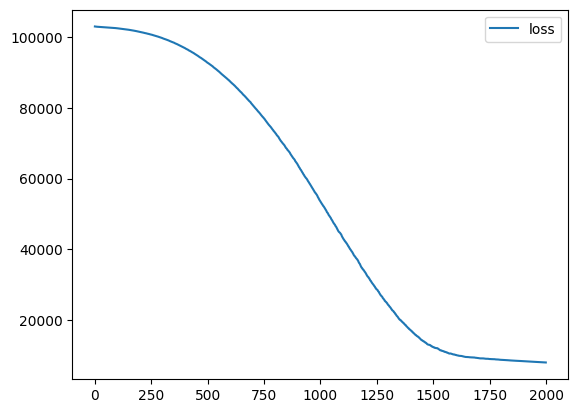

In [ ]:
loss_df.plot()

In [ ]:
x_test1 = scaler.transform(x_test)


In [ ]:
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 128ms/step - loss: 8595.7832


8595.783203125

In [ ]:
x_n1 = [[4]]

In [ ]:
x_n1_1 = scaler.transform(x_n1)

In [ ]:
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 95ms/step


array([[193.93579]], dtype=float32)